# Trump Twitter Word Cloud

Visualize popular Trump tweets around a topic using a word cloud and a list of the top five most retweeted tweets.

In [1]:
keyword = ''
keyword__placeholder = 'Enter a keyword to search for'

stopwords = ''
stopwords__placeholder = 'Comma separated list of words to ignore for the wordcloud'

color = 'Blues'
color__choices = 'Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r'.split(', ')

In [2]:
import re, os
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML
from PIL import Image

In [3]:
# data was prepared using `data-prep.ipynb`
df = pd.read_csv('trump_tweets.csv', dtype={'id_str':str}, parse_dates=['created_at'])

In [4]:
# find tweets matching keyword sorted by retweet count
subset = (df
          [df.text.str.contains('\\b%s\\b' % keyword, case=False) & (df.is_retweet == False)]
          .sort_values('retweet_count', ascending=False)
         )

In [5]:
if keyword:
    print(len(subset), 'tweets contain', '"%s"' % keyword)
else:
    print(len(subset), 'tweets total')

37802 tweets total


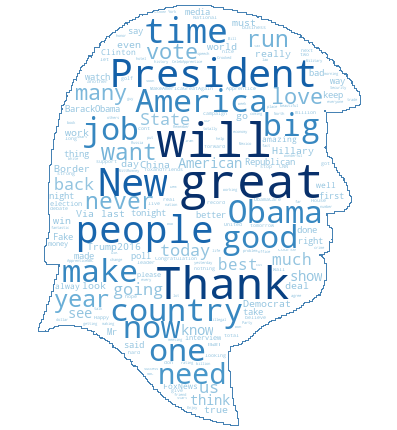

In [6]:
mask = np.array(Image.open("trump-silhouette.png"))
all_stopwords = set(stopwords.replace(',', ' ').split())|set(['realDonaldTrump', 'Trump', 'Donald'])|STOPWORDS
max_font_size = 48

class colormap_color_func(object):
    """
    Choose a color based on font_size
    """
    def __init__(self, colormap):
        import matplotlib.pyplot as plt
        self.colormap = plt.cm.get_cmap(colormap)

    def __call__(self, word, font_size, position, orientation,
                 random_state=None, **kwargs):
        r, g, b, _ = np.maximum(0, 255 * np.array(self.colormap(
            max(0.4, font_size / max_font_size))))
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(r, g, b)

# Gather text
text = '\n'.join(subset.text)
# Remove links and clean up
text = re.sub('https?://[^\s]+', '', text.replace('&amp', ''))
# Generate wordcloud
WordCloud(
    width=600, height=300, stopwords=all_stopwords, 
    relative_scaling=0.3, max_font_size=max_font_size,
    color_func=colormap_color_func(color), background_color='white',
    collocations=False, prefer_horizontal=1.0,
    mask=mask, contour_width=1, contour_color='steelblue'
).generate(text).to_image()

In [7]:
HTML('<h4>Most retweeted tweets%s:</h4>' % (f' containing "{keyword}"' if keyword else ''))

In [8]:
html = '''
<p><a target="_blank" href="https://twitter.com/realDonaldTrump/status/{id_str}">
    <font size=+1>{text}</font></a><br />{created_at}<br />
    {retweet_count} Retweets {favorite_count} Likes</p>
'''
for _,r in subset.head().iterrows():
    display(HTML(html.format(**r)))